In [4]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hanifalirsyad","key":"de62fbe3f4d3d8a629805db0a52df53c"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d mirajshah07/netflix-dataset

 36% 10.0M/27.5M [00:00<00:00, 24.4MB/s]
100% 27.5M/27.5M [00:00<00:00, 62.3MB/s]


In [8]:
!unzip /content/netflix-dataset.zip

Archive:  /content/netflix-dataset.zip
  inflating: IMDb movies.csv         
  inflating: IMDb ratings.csv        
  inflating: netflix_dataset.csv     


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [10]:
netflix_data = pd.read_csv('/content/netflix_dataset.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [12]:
dict = {}
for i in list(netflix_data.columns):
    dict[i] = netflix_data[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769


show_id memang mewakili kunci utama dari dataset. Hanya ada dua jenis jenis konten Netflix, sedangkan jenis konten lain yang didistribusikan dalam rentang yang luas akan membutuhkan analisis lebih lanjut dengan grafik.

# **Missing Values**

In [13]:
print('Table of missing values: ')
print(netflix_data.isnull().sum())

Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


# **Exploratory Data Analysis**

**Analysis of Movies vs TV Shows**

Text(0.5, 1.0, 'Movies VS TV Shows')

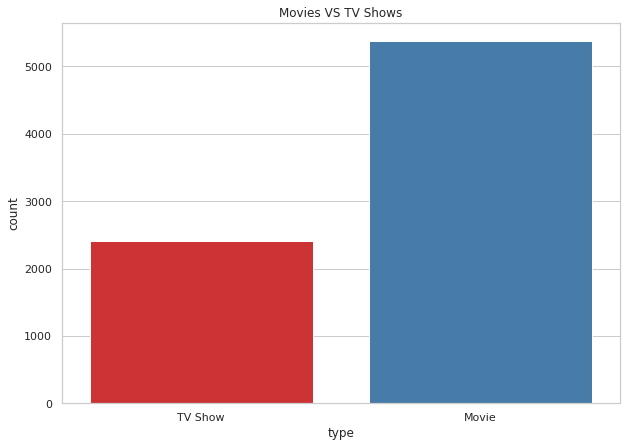

In [14]:
movies_data=netflix_data[netflix_data['type']=='Movie']
tvshows_data=netflix_data[netflix_data['type']=='TV Show']

plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_data, palette="Set1")
ax.set_title("Movies VS TV Shows")

Terlihat pada grafik diatas, bahwa Movie lebih banyak di Netflix daripada TV Shows.

# **Heatmap for Analysis**

**Membuat Heatmap untuk Melihat pada bulan apa saja, seorang produsen merilis filmnya.**

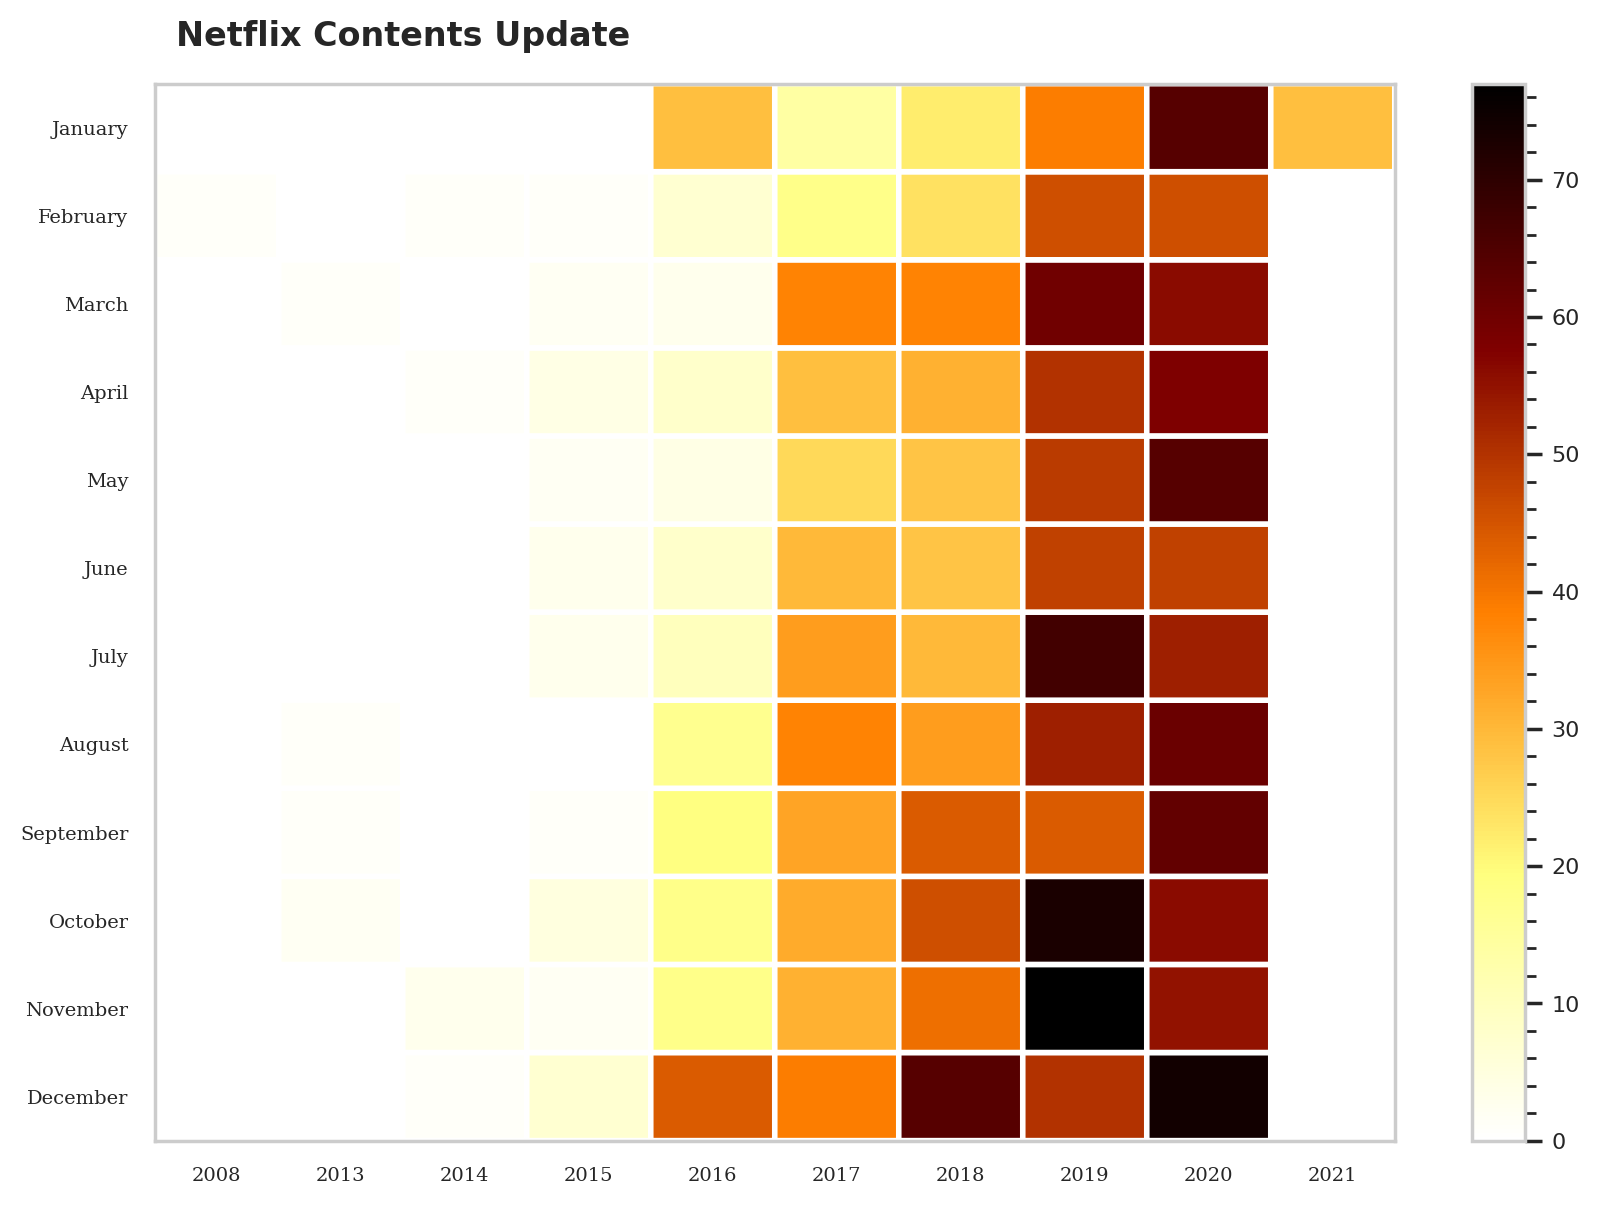

In [15]:
netflix_date = tvshows_data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Terlihat pada tahun 2020, bulan Februari dan Juni adalah bulan ketika konten yang dirilis relatif lebih sedikit.

# **Movie Ratings Analysis**

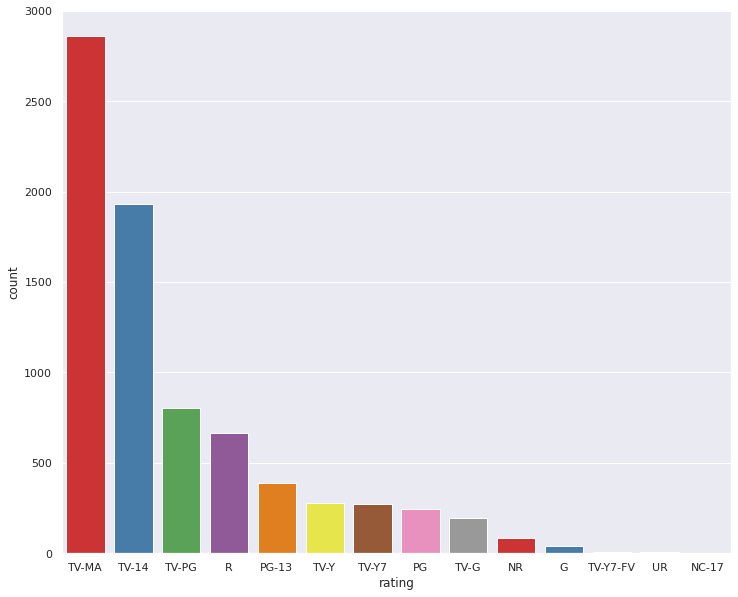

In [16]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_data, palette="Set1", order=netflix_data['rating'].value_counts().index[0:15])

Terlihat pada grafik diatas TV-MA memiliki rating paling tinggi. TV-MA adalah peringkat yang diberikan oleh Pedoman Orang Tua TV untuk program televisi yang dirancang hanya untuk dewasa.

Rating tertinggi kedua adalah TV-14 (konten yang mungkin tidak pantas untuk anak-anak di bawah usia 14 tahun.)

Rating tertinggi ketiga adalah TV-PG (berisi beberapa materi yang mungkin dianggap tidak pantas oleh orang tua atau wali untuk anak-anak yang lebih muda. )

# **Analysis IMDB Ratings Top Rated Movies on Netflix**

In [17]:
imdb_ratings=pd.read_csv('/content/IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/content/IMDb movies.csv', usecols=['title','year','genre'])
ratings=pd.DataFrame({'Title':imdb_titles.title,
                      'Release Year':imdb_titles.year,
                      'Rating':imdb_ratings.weighted_average_vote,
                      'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

Melakukan inner join pada dataset peringkat dan dataset netflix untuk mendapatkan konten yang memiliki peringkat di IMDB dan tersedia di Netflix.

In [18]:
ratings.dropna()
joint_data=ratings.merge(netflix_data,left_on='Title', right_on='title', how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

# **Top Rated 10 Movies in Netflix**

In [19]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

# **Top countries creating contents**

In [20]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


# **Year wise analysis**

In [21]:
last_years = netflix_data[netflix_data['release_year']>2005 ]
last_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


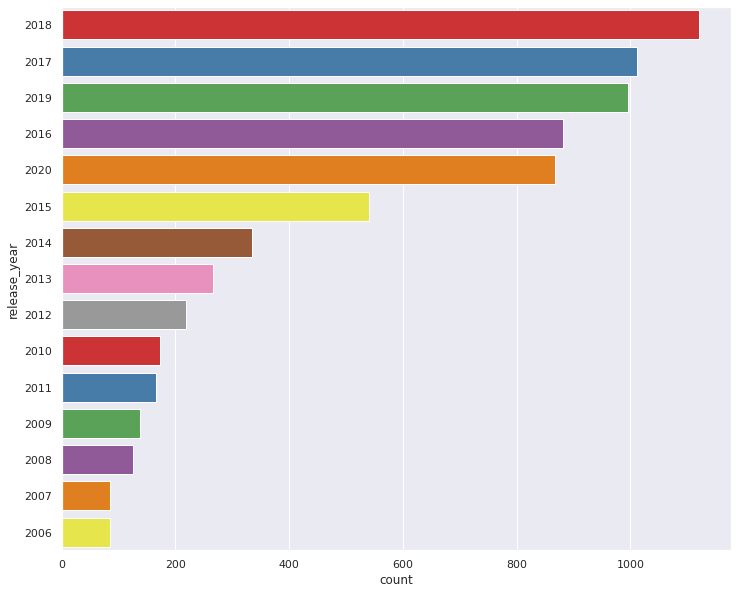

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", 
                   data=last_years, 
                   palette="Set1", 
                   order=netflix_data['release_year'].value_counts().index[0:15])

Terlihat pada grafik diatas, tahun 2018 adalah paling banyak konten dirilis

# **TV Shows Analysis**

In [23]:
countries={}
tvshows_data['country']=tvshows_data['country'].fillna('Unknown')
cou=list(tvshows_data['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [24]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Italy')]

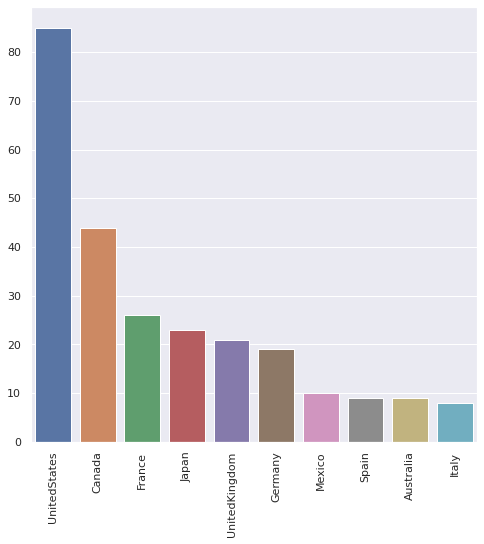

In [25]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

Amerika Serikat memiliki konten acara TV terbanyak yang dibuat di netflix.

# **Analysis of duration of movies**

In [26]:
movies_data['duration']=movies_data['duration'].str.replace(' min','')
movies_data['duration']=movies_data['duration'].astype(str).astype(int)
movies_data['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

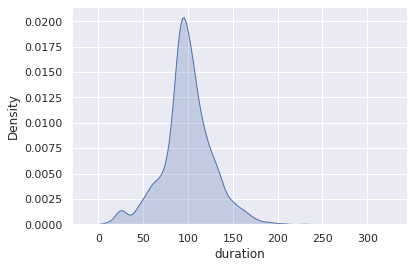

In [27]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=movies_data['duration'], shade=True)

Dari grafik diatas terlihat bahwa film di netflix garis besar berdurasi 75-120 Menit. Hal ini dapat di validasi dengan fakta bahwa cukup banyak penonton yang tidak dapat menonton film berdurasi 3 jam dalam sekali tonton.

# **Analysis of duration of TV Shows**

In [28]:
features=['title','duration']
durations= tvshows_data[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [29]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [30]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

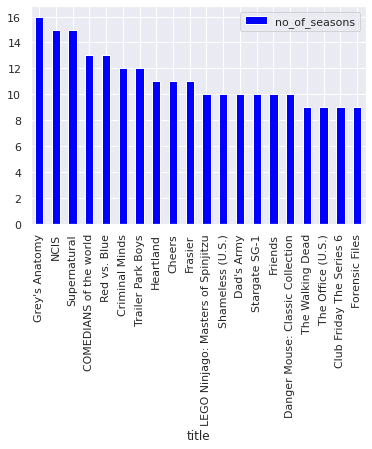

In [31]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

Grey's Anatomy, NCIS dan Supernatural adalah salah satu serial tv yang memiliki jumlah Season terbanyak.

# **Content-Based Recommendation System**

**Plot description based Recommender (Content Based Recommendations)**

Kita akan menghitung skor kemiripan korelasi untuk semua film berdasarkan deskripsi plot dan merekomendasikan film berdasarkan skor kemiripan tersebut. Deskripsi plot diberikan dalam fitur deskripsi dataset kami.

In [32]:
netflix_data['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

netflix_data['description'] = netflix_data['description'].fillna('')

tfidf_matrix = tfidf.fit_transform(netflix_data['description'])

tfidf_matrix.shape

(7787, 17905)

In [35]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [36]:
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

In [37]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return netflix_data['title'].iloc[movie_indices]

In [38]:
get_recommendations('Welcome')

1761                  Dil Vil Pyaar Vyaar
6782                The Princess Weiyoung
866                               Bewafaa
3082                     It's Okay, Buddy
7245                           True Tunes
2472                             Gomorrah
302                      Acts of Violence
3859                          Magnificent
4938    Power Rangers Operation Overdrive
4692                        Our Godfather
Name: title, dtype: object

In [39]:
get_recommendations('Avengers: Infinity War')

6920                              The Talented Mr. Ripley
6270                                         The Darkness
400                                Aliens Ate My Homework
3589              LEGO Marvel Super Heroes: Black Panther
1338                       Chilling Adventures of Sabrina
7446                                              Vroomiz
4678                                            Orbiter 9
1448                                           Code Lyoko
7388                                             Vampires
3590    LEGO Marvel Super Heroes: Guardians of the Galaxy
Name: title, dtype: object

In [40]:
get_recommendations('Dil Dhadakne Do')

6464                     The House of Flowers
4603                                Old Money
377                                     Alelí
593                           Ascharyachakit!
5171                                  Results
1123                                 Budapest
3916                           Mansfield Park
5662        Sleepless Society: Bedtime Wishes
1192                         Can You Hear Me?
3583    LEGO Friends: The Power of Friendship
Name: title, dtype: object

Meskipun sistem telah melakukan pekerjaan yang layak untuk menemukan film dengan deskripsi plot yang serupa, kualitas rekomendasinya tidak terlalu bagus. "Welcome" mengembalikan film dengan deskripsi yang mirip, sementara kemungkinan besar orang-orang yang menyukai film itu lebih cenderung menikmati film Akshay Kumar lainnya. Ini adalah sesuatu yang tidak dapat ditangkap oleh sistem yang ada sekarang.

Oleh karena itu, lebih banyak metrik ditambahkan ke model untuk meningkatkan kinerja.

In [42]:
filledna=netflix_data.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Langkah selanjutnya adalah mengubah nama dan contoh kata kunci menjadi huruf kecil dan menghapus semua spasi di antara mereka.

In [43]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [44]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [45]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


In [46]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

Langkah-langkah selanjutnya sama dengan apa yang kita lakukan dengan rekomendasi berbasis deskripsi plot kita.

Satu perbedaan penting adalah bahwa kita menggunakan CountVectorizer() bukan TF-IDF.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [49]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [52]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return netflix_data['title'].iloc[movie_indices]

In [53]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [54]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

7058                               Thor: Ragnarok
5698                      Solo: A Star Wars Story
2700                                          Her
5118                                   Real Steel
5699    Solo: A Star Wars Story (Spanish Version)
959                                 Black Panther
3006                                     Inkheart
5632                                  Singularity
1741                   Di Renjie zhi Sidatianwang
2586                      Halo: The Fall of Reach
Name: title, dtype: object

In [55]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

7769    Zindagi Na Milegi Dobara
362                     AK vs AK
6878             The Sky Is Pink
1757              Dil Chahta Hai
3912                        Mann
4872                          PK
2571                      Haapus
886               Bhangra Paa Le
5954            Taare Zameen Par
1261             Chal Dhar Pakad
Name: title, dtype: object

In [63]:
get_recommendations_new('Case', cosine_sim2)

6973        The Valhalla Murders
7474                      Wanted
5635                    Sintonia
952                  Black Heart
6949           The Truth Seekers
7350                     Unit 42
7738             Young Wallander
3013    Inside the Criminal Mind
3388              Killer Ratings
6033       Terrorism Close Calls
Name: title, dtype: object

Kami melihat rekomendasi telah berhasil menangkap lebih banyak informasi karena lebih banyak data dan telah memberikan bisa dibilang rekomendasi yang lebih baik. Kemungkinan besar penggemar komik Marvel atau DC akan menyukai film dari produksi yang sama. Oleh karena itu, untuk fitur di atas kita dapat menambahkan production_company .